In [14]:
import numpy as np

In [15]:
X = np.array([[7,5,0,0,3,2],
             [6,4,5,1,4,8],
             [9,0,2,2,5,4],
             [6,3,4,7,9,8],
             [5,7,5,6,9,0],
             [7,9,0,8,2,3]])

f = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

What are the dimensions of the input and the kernel (or filter)?

Shape of input

In [16]:
X.shape

(6, 6)

Shape of filter

In [17]:
f.shape

(3, 3)

How many parameters are there in the kernel f?

In [18]:
len(f.reshape(-1))

9

What is the output activation map when you apply the convolutional operation using the filter f on the input X without padding?

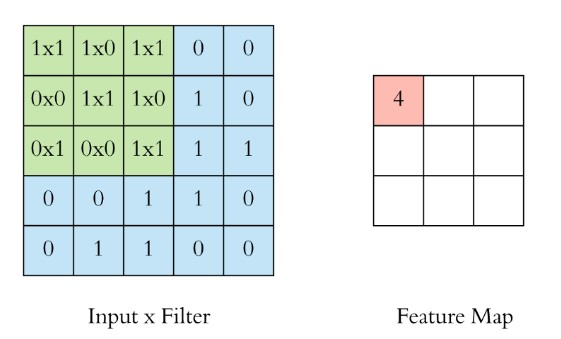

The elements in X matrix are accessed only for size of filter (3x3) -

In [19]:
X[0:3,0:3]

array([[7, 5, 0],
       [6, 4, 5],
       [9, 0, 2]])

we multiply the the X of size (3x3) using the filter -

In [20]:
X[0:3,0:3]*f

array([[  7,   0,   0],
       [ 12,   0, -10],
       [  9,   0,  -2]])

Now we need to add the element to give a single value

In [21]:
sum((X[0:3,0:3]*f).reshape(-1))

16

Now we just need to run this operation for all elemets in X matrix using two loops of lenght 4 each for rows and column size respectively.

In [22]:
final_output = []
bias = 0 
for j in range(X.shape[0]-f.shape[0]+1):
    feature = []
    for i in range(X.shape[1]-f.shape[1]+1):
        cvp = np.sum((X[j:(f.shape[0])+j,i:(f.shape[1]+i)]*f).reshape(-1)) + bias
        feature.append(cvp)
    final_output.append(feature)
final_output = np.array(final_output)

In [23]:
print(final_output)

[[ 16   9  -4 -18]
 [ 17  -5 -10 -12]
 [ 11  -9 -17   2]
 [  9  -1 -15  16]]


What is the output when you apply a max-pooling operation on the output from the previous question?

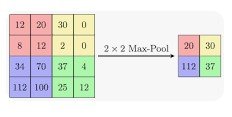

First make a matrix of half size




In [24]:
final_output[0:2,0:2]

array([[16,  9],
       [17, -5]])

We try to take the max from this matrix

In [25]:
max(final_output[0:2,0:2].reshape(-1))

17

We then try to repaet this process for all the entire output matrix.

In [26]:
import skimage.measure
skimage.measure.block_reduce(final_output, (2,2), np.max)

array([[17, -4],
       [11, 16]])